#### import basic Libraries

In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [595]:
##### Load The Data Sets
df = pd.read_csv('temprature.csv')

In [596]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


##### EDA Process 

In [597]:
#### check for the dtypes information /information statistical summary
df.dtypes


station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [598]:
##### check the null / missing value present 
df.isnull()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7750,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [599]:
###### check the count sum of null values present 
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [600]:
##### Many columns have null value present have to fill with median /mean/mode techniques

In [601]:
##### check the statistical summary
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

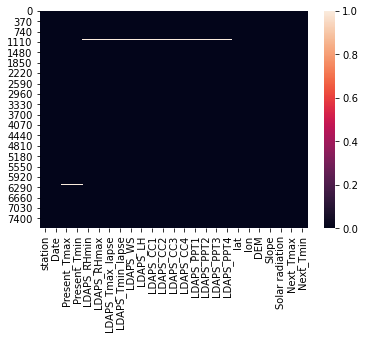

In [602]:
#### VISUALIZATION
sns.heatmap(df.isnull())

In [603]:
##### few Missing value is seeing in data set

In [604]:
#### lets Handle the missing value 
#### Start Data Cleaning

In [605]:
mode_date = df['Date'].mode()[0]

In [606]:
df['Date'].fillna(mode_date,inplace = True)

In [607]:
df['Date'].isnull().sum()

0

In [608]:
##### change the date to date format
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [609]:
change_into_datetime('Date')

In [610]:
#### split Date into Day,month and Year
df['day'] = df['Date'].dt.day

In [611]:
df['month'] = df['Date'].dt.month

In [612]:
df['year'] = df['Date'].dt.year

In [613]:
##### Excatrtin day month and year lets drop the original columns
df.drop(['Date'],axis=1,inplace = True)

<AxesSubplot:xlabel='station', ylabel='Density'>

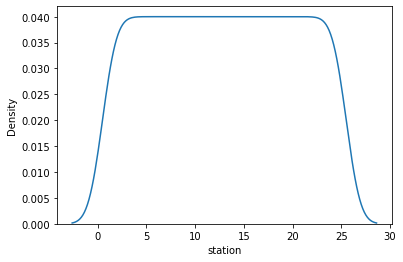

In [614]:
sns.kdeplot(df['station'])

In [615]:
##### Data is not Normally distributed fill NaN Value woth median 
df['station'].fillna(df['station'].median(),inplace =True)

In [616]:
df['station'].isnull().sum() ### No Missing value is now present

0

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

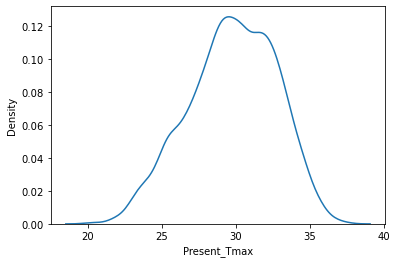

In [617]:
sns.kdeplot(df['Present_Tmax'])

In [618]:
##### data is seems to normally distributed use mean 
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)

In [619]:
df['Present_Tmax'].isnull().sum() ### no missing value is now present

0

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

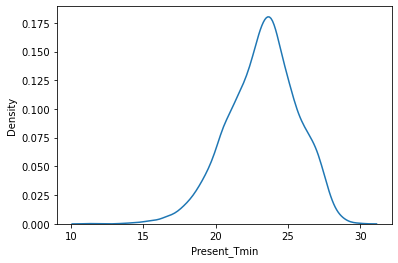

In [620]:
sns.kdeplot(df['Present_Tmin'])

In [621]:
#### Normal Distrubution use mean to fill NaN Value
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace = True)

In [622]:
df['Present_Tmin'].isnull().sum() ### no missing value is showing 

0

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

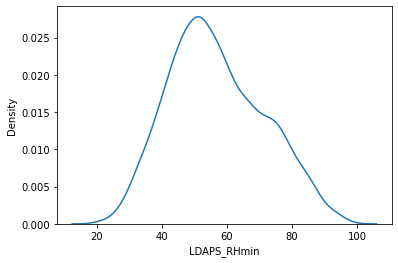

In [623]:
sns.kdeplot(df['LDAPS_RHmin'])

In [624]:
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace=True)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

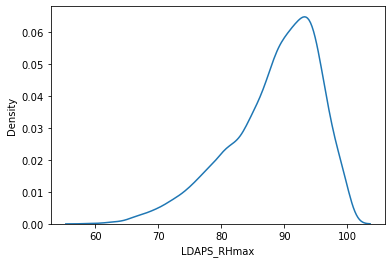

In [625]:
sns.kdeplot(df['LDAPS_RHmax'])

In [626]:
##### Left skew seems to in grap use median to fill missing value
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median(),inplace=True)

In [627]:
df['LDAPS_RHmax'].isnull().sum() #### all missing value is replace by Median

0

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

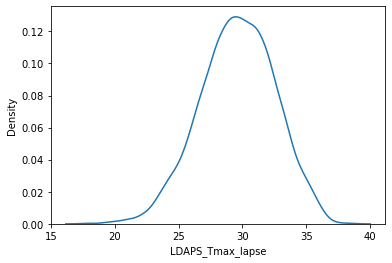

In [628]:
sns.kdeplot(df['LDAPS_Tmax_lapse'])

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

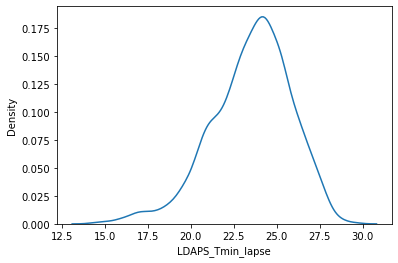

In [629]:
sns.kdeplot(df['LDAPS_Tmin_lapse'])

In [630]:
##### In both use median to replace the missing value some skewness is showing

In [631]:
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].median(),inplace=True)

In [632]:
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median(),inplace=True)

In [633]:
#### check for missing value
df['LDAPS_Tmin_lapse'].isnull().sum()

0

In [634]:
df['LDAPS_Tmax_lapse'].isnull().sum()

0

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

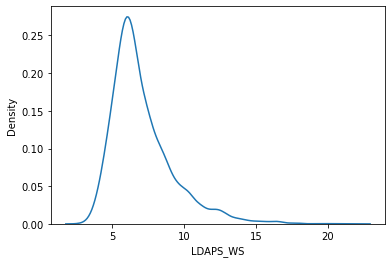

In [635]:
sns.kdeplot(df['LDAPS_WS'])

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

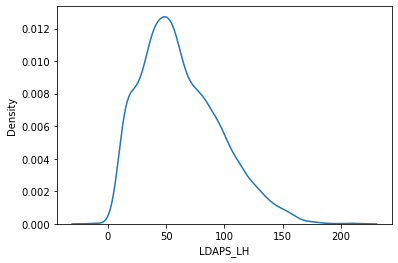

In [636]:
sns.kdeplot(df['LDAPS_LH'])

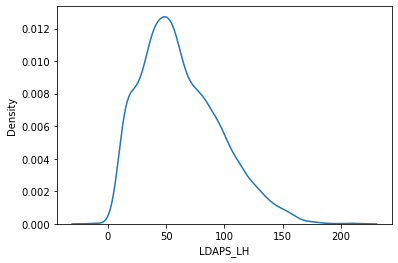

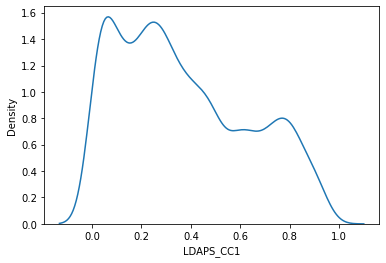

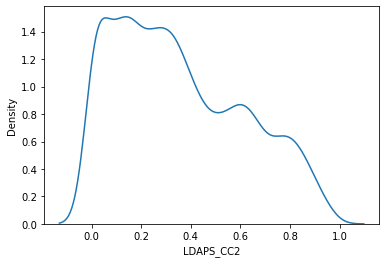

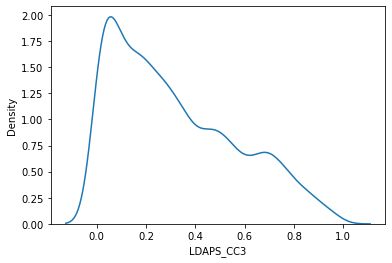

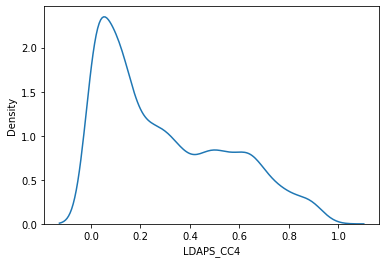

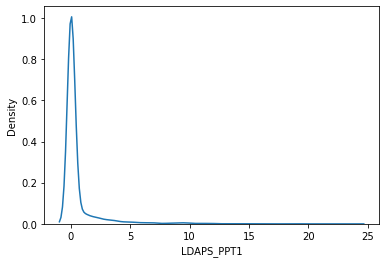

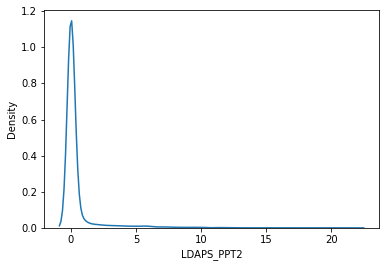

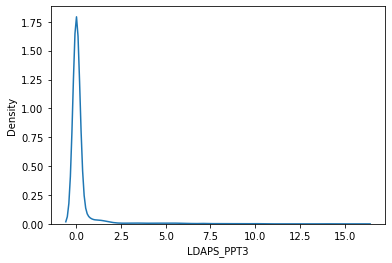

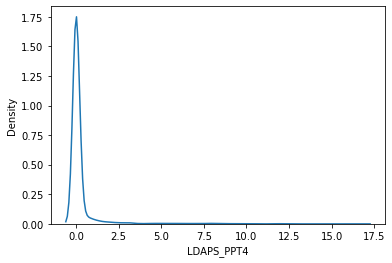

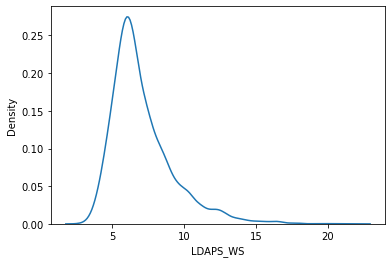

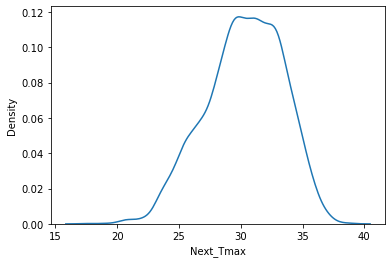

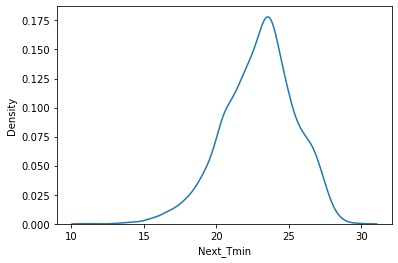

In [637]:
for i in ['LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','LDAPS_WS','Next_Tmax','Next_Tmin']:
    sns.kdeplot(df[i])
    plt.show()

In [638]:
#### skewness seems to be in rest show use median to fill all missing value so
for i in ['LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','LDAPS_WS','Next_Tmax','Next_Tmin']:
    df[i].fillna(df[i].median(),inplace=True)

In [639]:
##### check for missing value
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

In [640]:
#### Handle the all missing value with mean ,median and mode

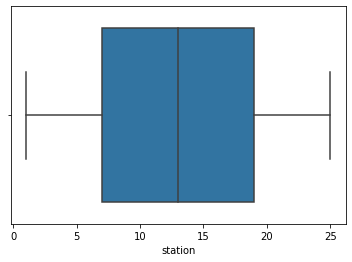

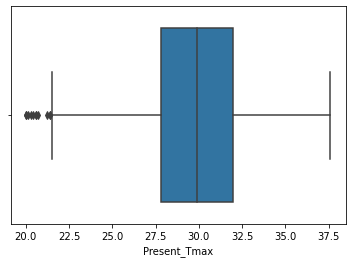

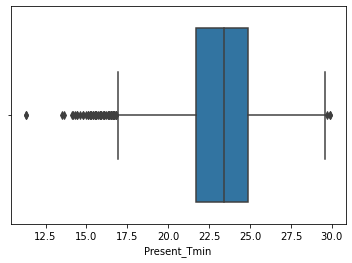

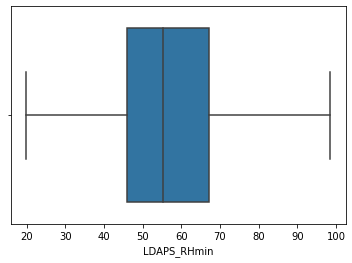

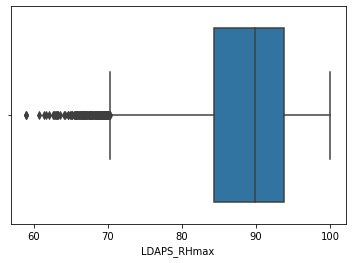

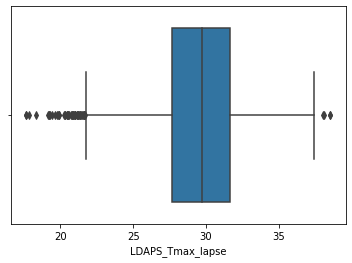

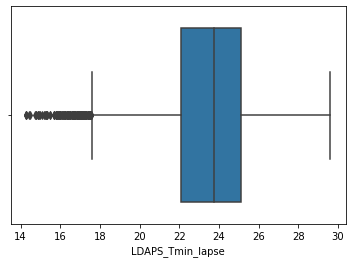

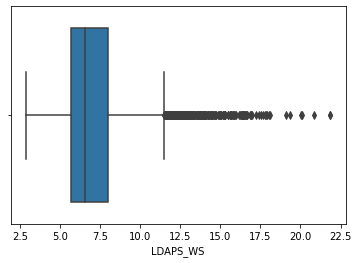

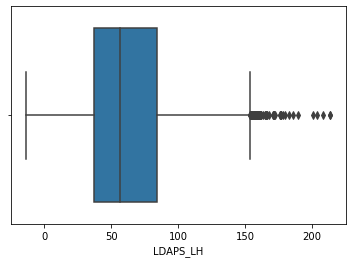

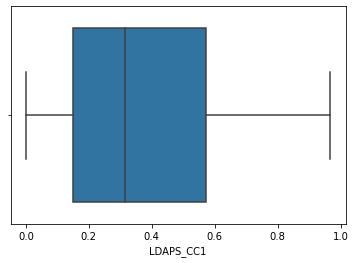

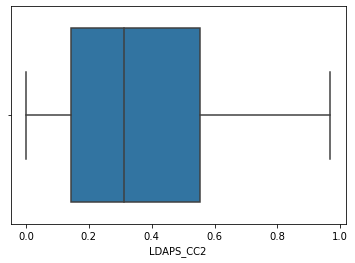

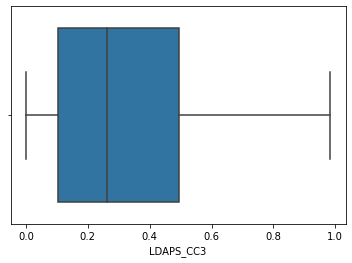

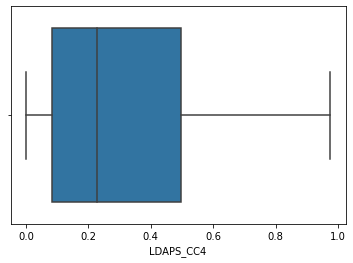

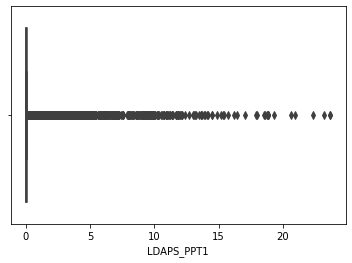

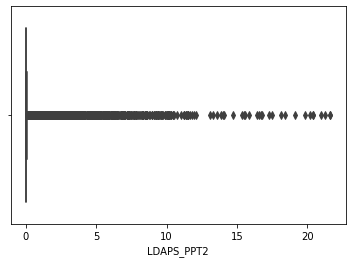

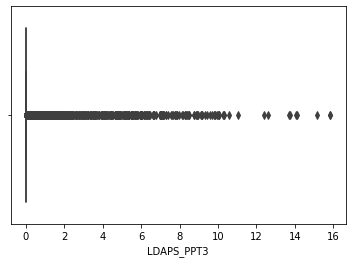

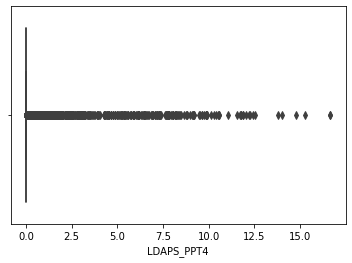

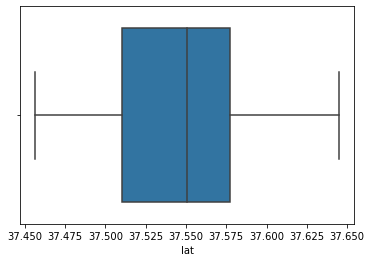

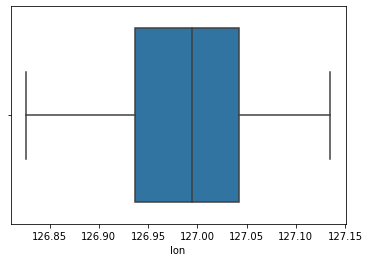

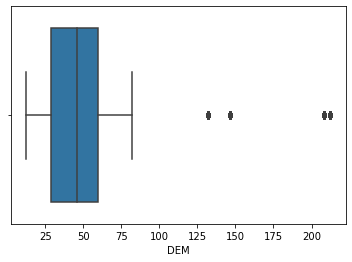

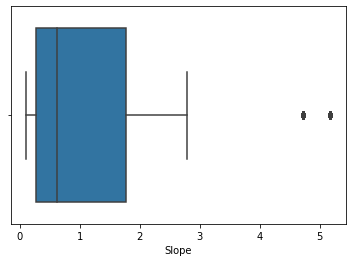

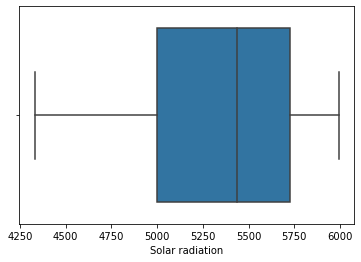

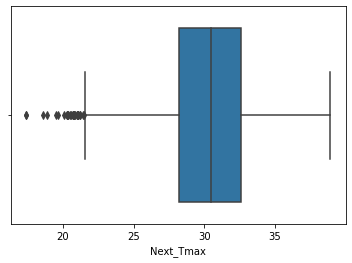

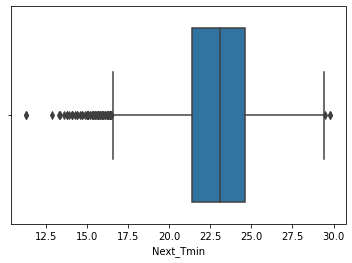

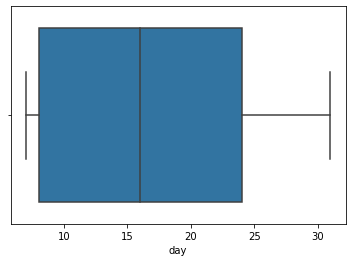

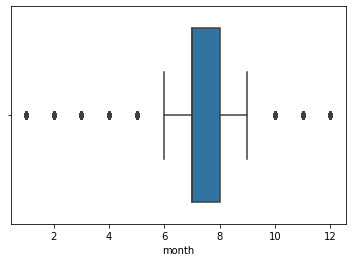

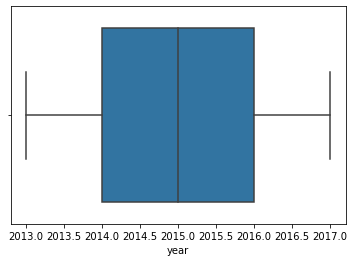

In [641]:
##### lets check for the outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [642]:
#### lets Handle tht Outliers
median = np.median(df['Present_Tmax'])
df['Present_Tmax']=np.where(df['Present_Tmax']<=22,median,df['Present_Tmax'])

In [643]:
median = np.median(df['Present_Tmax'])
df['Present_Tmin']=np.where(df['Present_Tmin']<=17.2,median,df['Present_Tmin'])

In [644]:
median = np.median(df['LDAPS_RHmax'])
df['LDAPS_RHmax']=np.where(df['LDAPS_RHmax']<=70,median,df['LDAPS_RHmax'])

In [645]:
median = np.median(df['LDAPS_Tmax_lapse'])
df['LDAPS_Tmax_lapse']=np.where(df['LDAPS_Tmax_lapse']<=23,median,df['LDAPS_Tmax_lapse'])

In [646]:
median = np.median(df['LDAPS_Tmin_lapse'])
df['LDAPS_Tmin_lapse']=np.where(df['LDAPS_Tmin_lapse']<=18.3,median,df['LDAPS_Tmin_lapse'])

In [647]:
median = np.median(df['LDAPS_WS'])
df['LDAPS_WS']=np.where(df['LDAPS_WS']>=12,median,df['LDAPS_WS'])

In [648]:
median = np.median(df['LDAPS_WS'])
df['LDAPS_LH']=np.where(df['LDAPS_LH']>=151,median,df['LDAPS_LH'])

In [649]:
median = np.median(df['LDAPS_PPT1'])
df['LDAPS_PPT1']=np.where(df['LDAPS_PPT1']>=3.6,median,df['LDAPS_PPT1'])

In [650]:
median = np.median(df['LDAPS_PPT2'])
df['LDAPS_PPT2']=np.where(df['LDAPS_PPT2']>=3.3,median,df['LDAPS_PPT2'])

In [651]:
median = np.median(df['LDAPS_PPT2'])
df['LDAPS_PPT2']=np.where(df['LDAPS_PPT2']>=3.3,median,df['LDAPS_PPT2'])

In [652]:
median = np.median(df['LDAPS_PPT3'])
df['LDAPS_PPT3']=np.where(df['LDAPS_PPT3']>=1.4,median,df['LDAPS_PPT3'])

In [653]:
median = np.median(df['LDAPS_PPT4'])
df['LDAPS_PPT4']=np.where(df['LDAPS_PPT4']>=0.35,median,df['LDAPS_PPT4'])

In [654]:
median = np.median(df['DEM'])
df['DEM']=np.where(df['DEM']>=208.50,median,df['DEM'])

In [655]:
median = np.median(df['Slope'])
df['Slope']=np.where(df['Slope']>=4.72,median,df['Slope'])

In [656]:
median = np.median(df['Next_Tmax'])
df['Next_Tmax']=np.where(df['Next_Tmax']<=20,median,df['Next_Tmax'])

In [657]:
median = np.median(df['Next_Tmin'])
df['Next_Tmin']=np.where(df['Next_Tmin']<=15.0,median,df['Next_Tmin'])

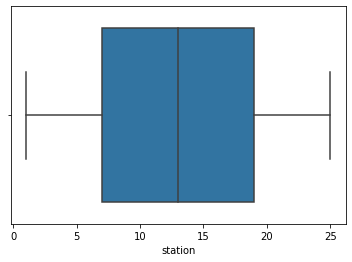

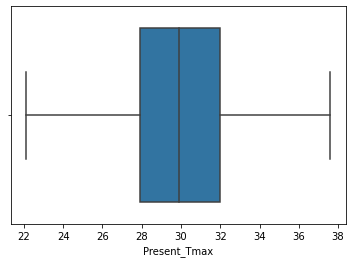

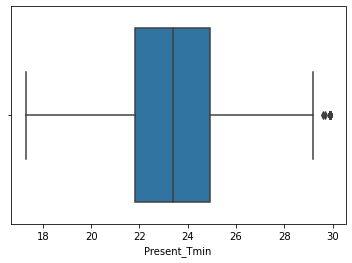

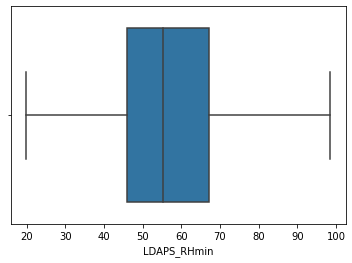

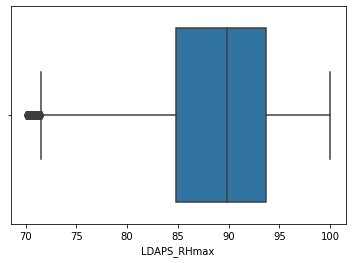

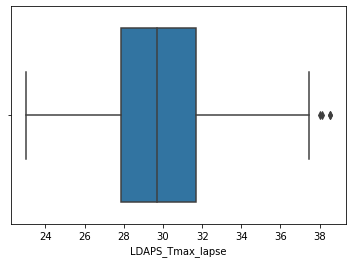

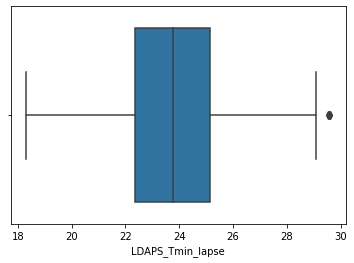

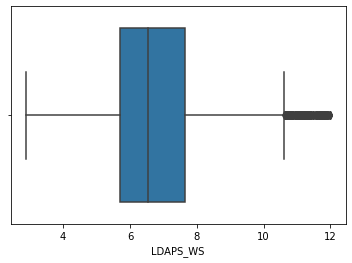

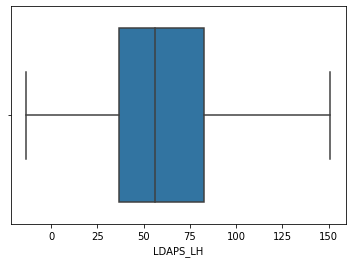

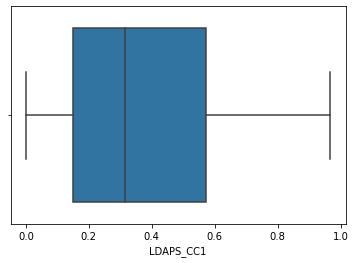

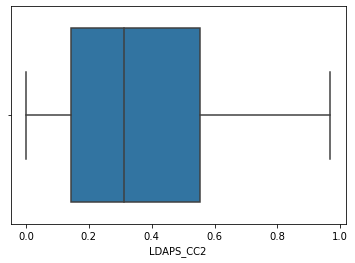

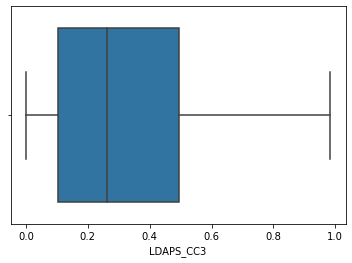

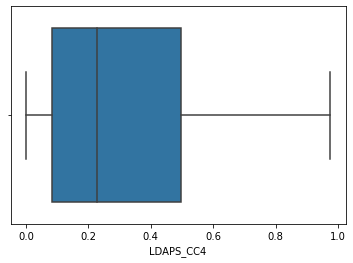

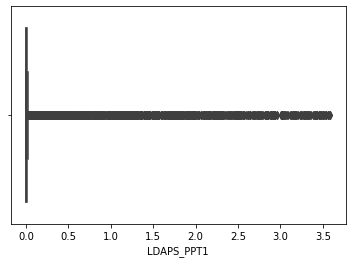

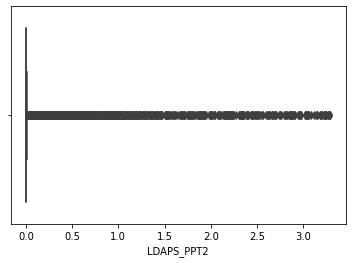

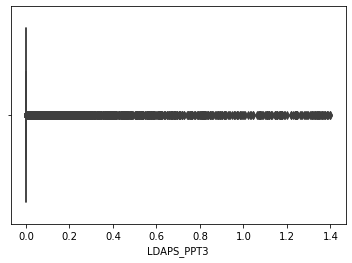

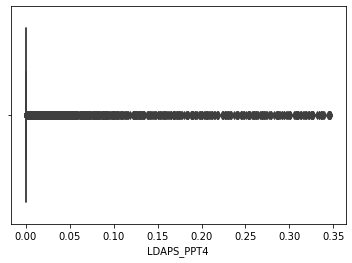

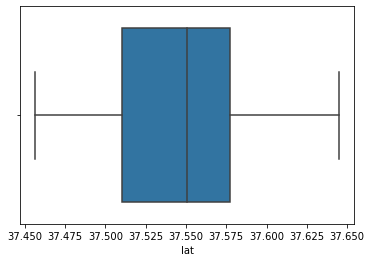

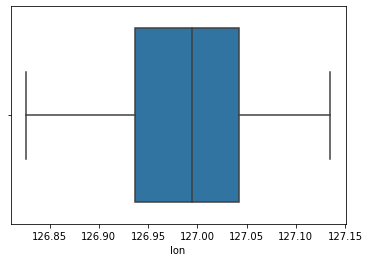

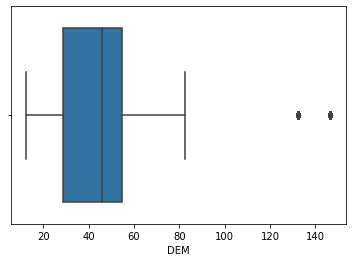

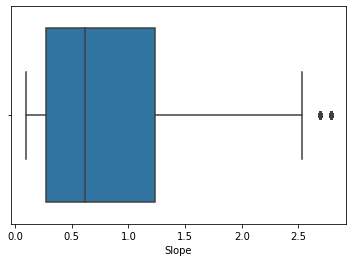

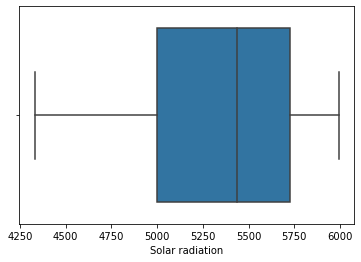

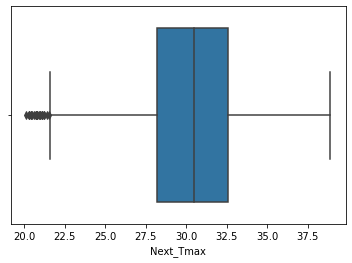

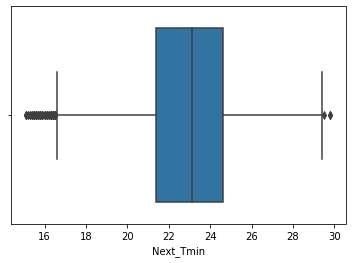

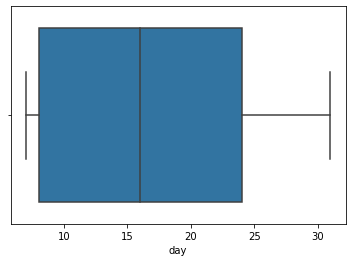

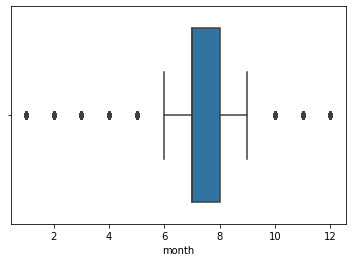

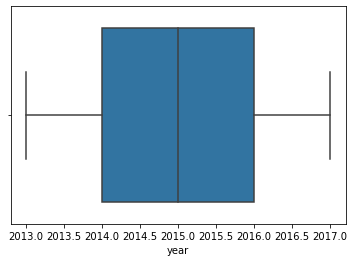

In [658]:
##### lets check for the outliers
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

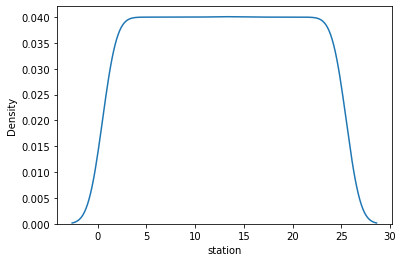

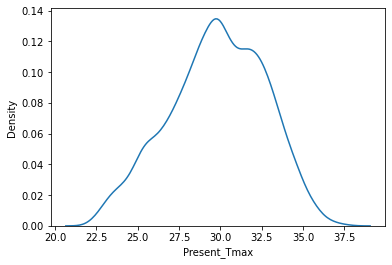

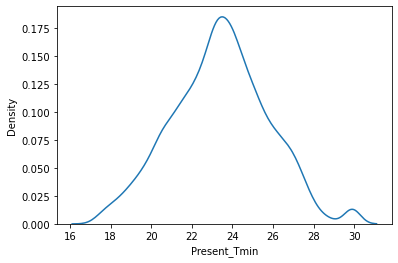

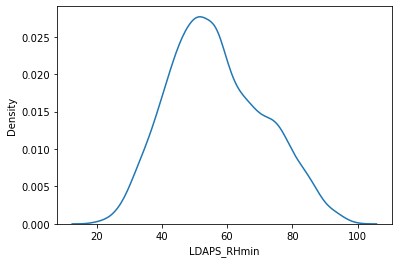

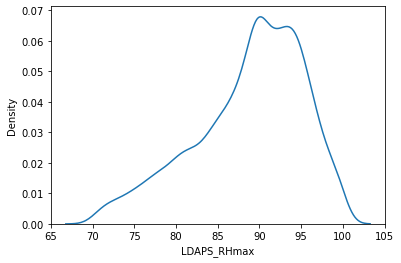

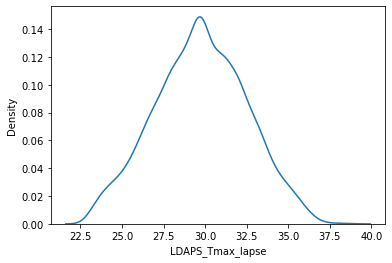

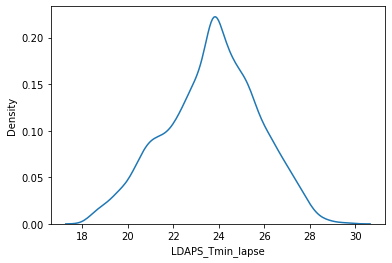

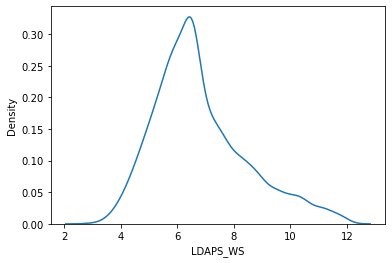

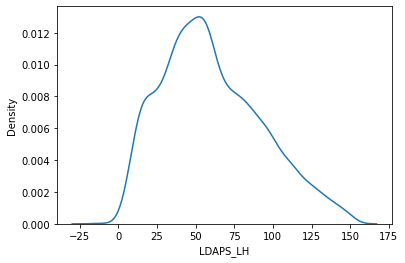

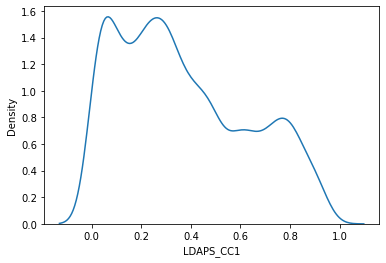

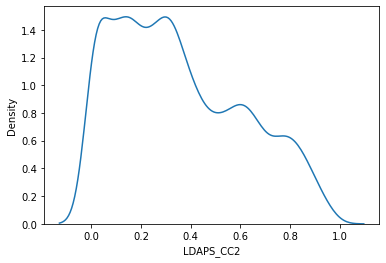

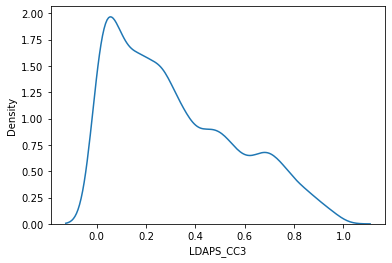

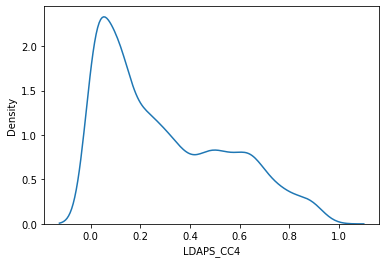

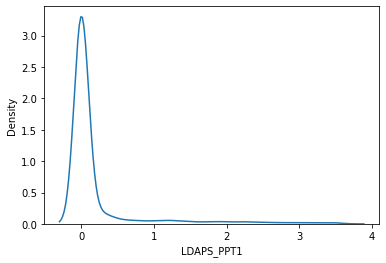

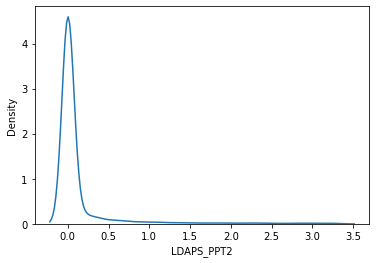

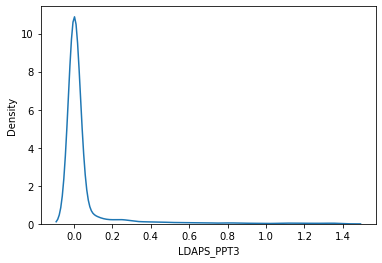

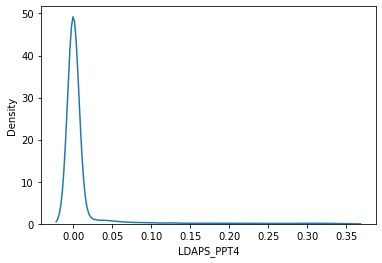

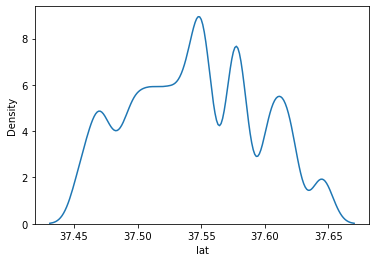

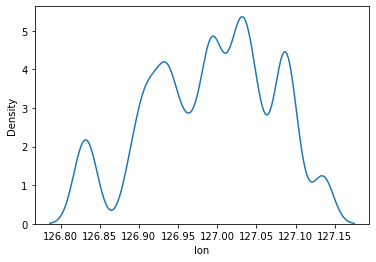

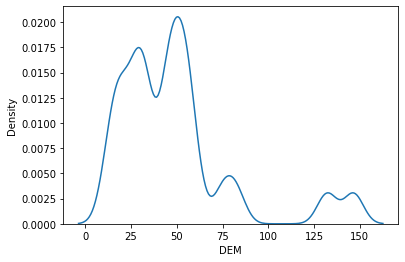

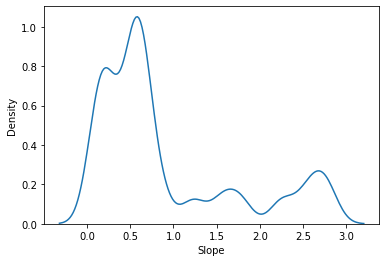

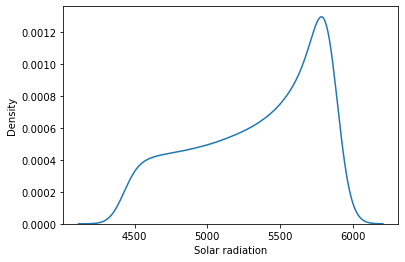

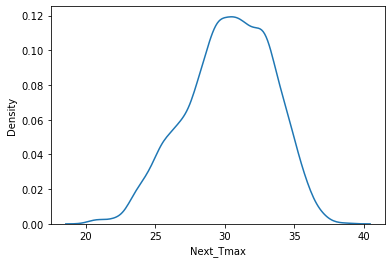

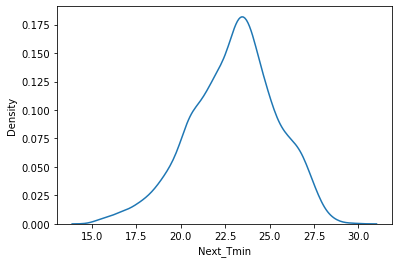

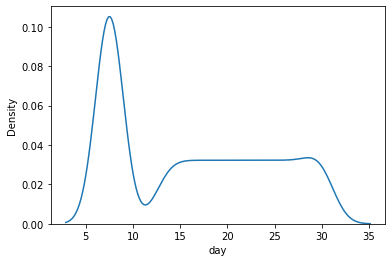

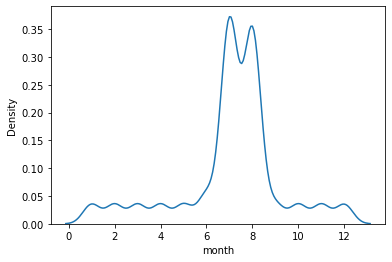

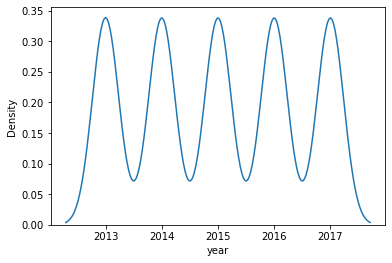

In [659]:
##### lets check for the outliers
for i in df.columns:
    sns.kdeplot(df[i])
    plt.show()

In [660]:
df.skew()

station             0.000000
Present_Tmax       -0.215230
Present_Tmin        0.041832
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.674397
LDAPS_Tmax_lapse   -0.019204
LDAPS_Tmin_lapse   -0.173827
LDAPS_WS            0.798425
LDAPS_LH            0.497769
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          3.518229
LDAPS_PPT2          4.558721
LDAPS_PPT3          4.547309
LDAPS_PPT4          5.242188
lat                 0.087062
lon                -0.285213
DEM                 1.684640
Slope               1.165479
Solar radiation    -0.511210
Next_Tmax          -0.313434
Next_Tmin          -0.306988
day                 0.245892
month              -0.706382
year                0.000365
dtype: float64

In [661]:
df['LDAPS_PPT1'] = np.sqrt(df['LDAPS_PPT1'])

In [662]:
df['LDAPS_CC3'] = np.sqrt(df['LDAPS_CC3'])

In [663]:
df['LDAPS_CC4'] = np.sqrt(df['LDAPS_CC4'])

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

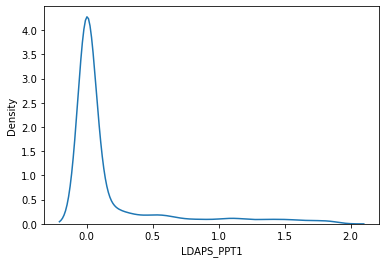

In [664]:
sns.kdeplot(df['LDAPS_PPT1'])

In [665]:
df['LDAPS_PPT1'] = np.sqrt(df['LDAPS_PPT1'])

In [666]:
df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

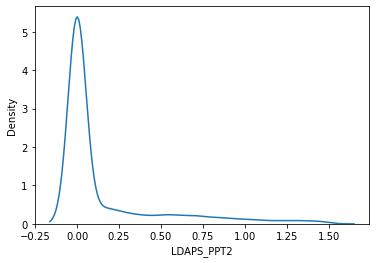

In [667]:
sns.kdeplot(df['LDAPS_PPT2'])

In [668]:
df['LDAPS_PPT2'] = np.sqrt(df['LDAPS_PPT2'])

In [669]:
df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

In [670]:
df['LDAPS_PPT2'] = np.sqrt(df['LDAPS_PPT2'])

In [671]:
df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

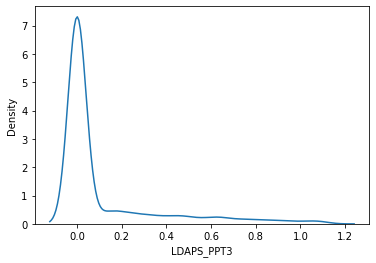

In [672]:
sns.kdeplot(df['LDAPS_PPT3'])

In [673]:
df['LDAPS_PPT3'] = np.sqrt(df['LDAPS_PPT3'])

In [674]:
df['Slope']=np.sqrt(df['Slope'])

In [675]:
df['Slope']=np.cbrt(df['Slope'])

<AxesSubplot:xlabel='DEM', ylabel='Density'>

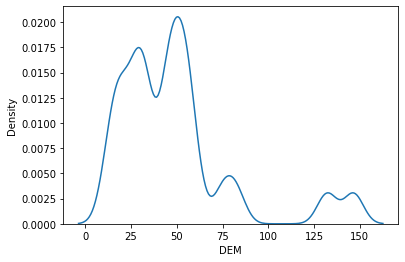

In [676]:
sns.kdeplot(df['DEM'])

In [677]:
df['Slope']=np.sqrt(df['Slope'])

<AxesSubplot:xlabel='Slope', ylabel='Density'>

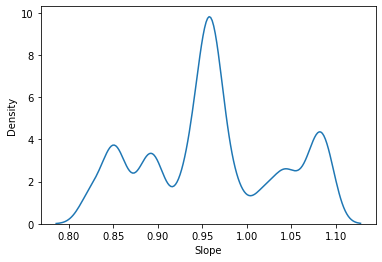

In [678]:
sns.kdeplot(df['Slope'])

In [679]:
df['Slope']=np.cbrt(df['Slope'])

In [680]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,45.7160,1.028860,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.981688,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.963893,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,1.026173,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.981228,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,29.9,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.949599,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.959090,4438.373535,28.6,18.8,30,8,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.964412,4451.345215,27.8,17.4,30,8,2017
7750,13.0,29.9,29.9,19.794666,89.793480,29.703426,23.760199,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.937641,4329.520508,30.5,23.1,7,1,2013


In [681]:
y1 = df.iloc[:,22:23]

In [682]:
y1

,Next_Tmax
0,29.1
1,30.5
2,31.1
3,31.7
4,31.2
...,...
7747,28.3
7748,28.6
7749,27.8
7750,30.5


In [683]:
y2 = df.iloc[:,23:24]

In [684]:
y2

,Next_Tmin
0,21.2
1,22.5
2,23.9
3,24.3
4,22.5
...,...
7747,18.1
7748,18.8
7749,17.4
7750,23.1


In [685]:
cat_col = df.iloc[:,24:27]

In [686]:
cat_col

,day,month,year
0,30,6,2013
1,30,6,2013
2,30,6,2013
3,30,6,2013
4,30,6,2013
...,...,...,...
7747,30,8,2017
7748,30,8,2017
7749,30,8,2017
7750,7,1,2013


In [687]:
df_2 = df.iloc[:,0:22]

In [688]:
df_2

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.361840,0.0,0.0,0.0,0.0,37.6046,126.991,45.7160,1.028860,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.357390,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.981688,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.376995,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.963893,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.366400,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,1.026173,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.412336,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.981228,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,29.9,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.949599,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.959090,4438.373535
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.028216,0.0,0.0,0.0,0.0,37.5237,126.970,19.5844,0.964412,4451.345215
7750,13.0,29.9,29.9,19.794666,89.793480,29.703426,23.760199,2.882580,-13.603212,0.000000,...,0.000000,0.0,0.0,0.0,0.0,37.4562,126.826,12.3700,0.937641,4329.520508


In [689]:
###### Label Encoder for day ,month ,year
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [690]:
for i in cat_col:
    cat_col[i] = le.fit_transform(cat_col[i])

In [691]:
cat_col

,day,month,year
0,19,5,0
1,19,5,0
2,19,5,0
3,19,5,0
4,19,5,0
...,...,...,...
7747,19,7,4
7748,19,7,4
7749,19,7,4
7750,0,0,0


In [692]:
##### for continous columns used standard scaler and its is robust to outliers
df_2.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

In [693]:
from sklearn.preprocessing import StandardScaler

In [694]:
sc = StandardScaler()

In [695]:
scaled = sc.fit_transform(df_2)

In [696]:
df_2 = pd.DataFrame(scaled,columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'])

In [697]:
df_2

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.664315,-0.379026,-0.839828,0.102515,0.353976,-0.601234,-0.339113,0.010250,0.272985,-0.514175,...,-0.475290,-0.572033,-0.615009,-0.548134,-0.244014,1.189286,-0.005000,-0.092398,1.632550,1.517935
1,-1.525622,0.721367,-0.755682,-0.308027,0.275822,0.042310,0.162336,-0.672871,-0.270105,-0.546482,...,-0.492732,-0.572033,-0.615009,-0.548134,-0.244014,1.189286,0.511177,-0.122190,-0.163452,1.229950
2,-1.386929,0.618205,-0.040442,-0.552814,-0.737091,0.129465,0.421151,-0.402329,-1.242660,-0.608363,...,-0.415894,-0.572033,-0.615009,-0.548134,-0.244014,0.653021,0.838510,-0.480087,-0.840961,1.216534
3,-1.248236,0.755754,0.001631,0.101426,1.173841,-0.010598,-0.183401,-0.698231,0.157489,-0.581458,...,-0.457420,-0.572033,-0.615009,-0.548134,-0.244014,1.991696,0.385280,-0.092398,1.530255,1.201176
4,-1.109544,0.549430,-0.629463,-0.040098,0.207146,-0.224569,-0.105212,-0.646737,1.467228,-0.830157,...,-0.277385,-0.572033,-0.615009,-0.548134,-0.244014,0.118743,1.807917,-0.426000,-0.180963,1.207205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,-2.235939,2.736370,-2.056591,-1.516692,-1.225012,-2.402934,-0.395847,0.353807,-1.294796,...,-1.893422,-0.572033,-0.615009,-0.548134,-0.244014,-0.149390,-1.263971,-1.033671,-1.385197,-2.093040
7748,1.525622,-2.235939,-2.396526,-2.241619,-1.757257,-0.986620,-2.423498,-0.157086,-0.415719,-1.272440,...,-1.893422,-0.572033,-0.615009,-0.548134,-0.244014,-0.417522,-1.037356,-0.980309,-1.023840,-2.104553
7749,1.664315,-2.270327,-2.522744,-2.317504,-1.765083,-0.649986,-2.526196,0.295366,-1.598728,-1.222369,...,-1.782837,-0.572033,-0.615009,-0.548134,-0.244014,-0.417522,-0.269384,-0.908803,-0.821227,-2.074325
7750,0.000000,0.033621,2.736370,-2.532517,0.151904,-0.011034,0.028296,-2.375713,-2.302405,-1.409773,...,-1.893422,-0.572033,-0.615009,-0.548134,-0.244014,-1.758184,-2.082302,-1.134195,-1.840471,-2.358212


In [698]:
##### LETS CREATE TWO DATASETS WITH TARGET VARIBALE IN EACH

In [699]:
df_1 = pd.concat([df_2,cat_col,y1],axis=1)

In [700]:
df_1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,day,month,year,Next_Tmax
0,-1.664315,-0.379026,-0.839828,0.102515,0.353976,-0.601234,-0.339113,0.010250,0.272985,-0.514175,...,-0.244014,1.189286,-0.005000,-0.092398,1.632550,1.517935,19,5,0,29.1
1,-1.525622,0.721367,-0.755682,-0.308027,0.275822,0.042310,0.162336,-0.672871,-0.270105,-0.546482,...,-0.244014,1.189286,0.511177,-0.122190,-0.163452,1.229950,19,5,0,30.5
2,-1.386929,0.618205,-0.040442,-0.552814,-0.737091,0.129465,0.421151,-0.402329,-1.242660,-0.608363,...,-0.244014,0.653021,0.838510,-0.480087,-0.840961,1.216534,19,5,0,31.1
3,-1.248236,0.755754,0.001631,0.101426,1.173841,-0.010598,-0.183401,-0.698231,0.157489,-0.581458,...,-0.244014,1.991696,0.385280,-0.092398,1.530255,1.201176,19,5,0,31.7
4,-1.109544,0.549430,-0.629463,-0.040098,0.207146,-0.224569,-0.105212,-0.646737,1.467228,-0.830157,...,-0.244014,0.118743,1.807917,-0.426000,-0.180963,1.207205,19,5,0,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,-2.235939,2.736370,-2.056591,-1.516692,-1.225012,-2.402934,-0.395847,0.353807,-1.294796,...,-0.244014,-0.149390,-1.263971,-1.033671,-1.385197,-2.093040,19,7,4,28.3
7748,1.525622,-2.235939,-2.396526,-2.241619,-1.757257,-0.986620,-2.423498,-0.157086,-0.415719,-1.272440,...,-0.244014,-0.417522,-1.037356,-0.980309,-1.023840,-2.104553,19,7,4,28.6
7749,1.664315,-2.270327,-2.522744,-2.317504,-1.765083,-0.649986,-2.526196,0.295366,-1.598728,-1.222369,...,-0.244014,-0.417522,-0.269384,-0.908803,-0.821227,-2.074325,19,7,4,27.8
7750,0.000000,0.033621,2.736370,-2.532517,0.151904,-0.011034,0.028296,-2.375713,-2.302405,-1.409773,...,-0.244014,-1.758184,-2.082302,-1.134195,-1.840471,-2.358212,0,0,0,30.5


In [712]:
##### Modeling for first data sets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
rf=RandomForestRegressor()
dtc = DecisionTreeClassifier()
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [705]:
#### divide x and y 
x = df_1.drop(['Next_Tmax'],axis=1)

y = df['Next_Tmax']

In [706]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
   # print(f"At Random State {i},the tarining accuracy is :- ",{r2_score(y_train,pred_train)})
   # print(f"At Random State {i},the Test accuracy is :- ",{r2_score(y_test,pred_test)})
    accu = r2_score(y_test,pred_test)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=i
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)

Best accuracy - 0.7408074062506952 Best Random state =  145


In [707]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=145)

In [708]:
print('Shape of x_train',x_train.shape)

Shape of x_train (5193, 25)


In [709]:
print('Shape of y_train',y_train.shape)

Shape of y_train (5193,)


In [710]:
print('Shape of x_test',x_test.shape)

Shape of x_test (2559, 25)


In [711]:
print('Shape of y_test',y_test.shape)

Shape of y_test (2559,)


In [713]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is : {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    print("Training Score : {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are : {}" ,format(predictions))
    print('\n')
    r2score = r2_score(y_test,predictions)
    print("r2 Score is : {}",format(r2score))
    print('Cross Validation Score: {}'.format(cross_val_score(ml_model,x_train,y_train,cv=5,scoring='r2')))
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    
    sns.distplot(y_test-predictions)
    
    

Model is : RandomForestRegressor()
Training Score : 0.9842494786090955
Predictions are : {} [34.329 28.417 32.666 ... 24.94  28.357 27.561]


r2 Score is : {} 0.9023524789831273
Cross Validation Score: [0.87119812 0.86976934 0.87048827 0.86900593 0.88675855]
MAE: 0.7259574052364203
MSE: 0.9250911688159433
RMSE: 0.9618165983262835


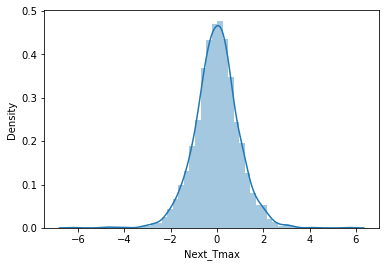

In [714]:
predict(RandomForestRegressor())

Model is : GradientBoostingRegressor()
Training Score : 0.8586469540044248
Predictions are : {} [33.56116392 29.06913592 32.3139166  ... 24.21767146 28.27798102
 27.67690307]


r2 Score is : {} 0.8419650000297777
Cross Validation Score: [0.81205128 0.82429862 0.82168492 0.81892612 0.82294316]
MAE: 0.952388229288512
MSE: 1.4971888821531782
RMSE: 1.223596699142809


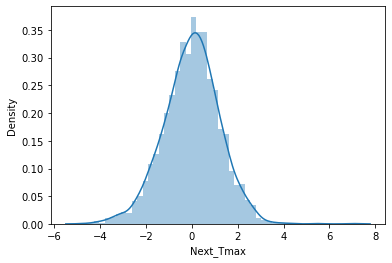

In [715]:
predict(GradientBoostingRegressor())

Model is : DecisionTreeRegressor()
Training Score : 1.0
Predictions are : {} [34.1 32.1 33.  ... 23.6 29.6 27.9]


r2 Score is : {} 0.743649860324779
Cross Validation Score: [0.66236904 0.71353406 0.71919655 0.76402128 0.72886961]
MAE: 1.0645564673700663
MSE: 2.4286049237983582
RMSE: 1.5583981916693685


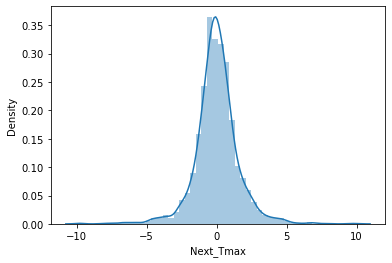

In [716]:
predict(DecisionTreeRegressor())

Model is : SVR()
Training Score : 0.7646581251412116
Predictions are : {} [34.12549525 28.81425983 33.51606477 ... 26.09207765 28.03353361
 28.9878221 ]


r2 Score is : {} 0.7927093931693612
Cross Validation Score: [0.73684728 0.74091996 0.74079715 0.73875582 0.76682791]
MAE: 1.0263769356546597
MSE: 1.963825684057938
RMSE: 1.4013656496639049


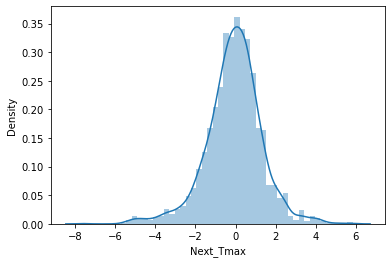

In [719]:
from sklearn.svm import SVR
predict(SVR(kernel='rbf'))

In [721]:
from sklearn.ensemble import ExtraTreesRegressor

Model is : ExtraTreesRegressor()
Training Score : 1.0
Predictions are : {} [34.008 28.3   33.389 ... 24.297 28.431 27.064]


r2 Score is : {} 0.9272785908919934
Cross Validation Score: [0.90341434 0.90769898 0.90217587 0.89866416 0.90750252]
MAE: 0.6217076983196557
MSE: 0.6889466588511127
RMSE: 0.8300281072657195


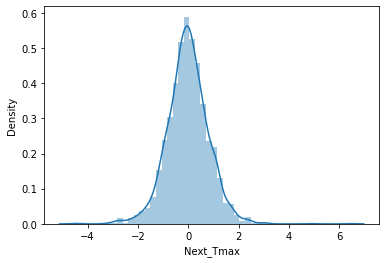

In [722]:
predict(ExtraTreesRegressor())

In [723]:
ET = ExtraTreesRegressor()
ET.fit(x_train,y_train)
pred_test=ET.predict(x_test)
pred_train=ET.predict(x_train)

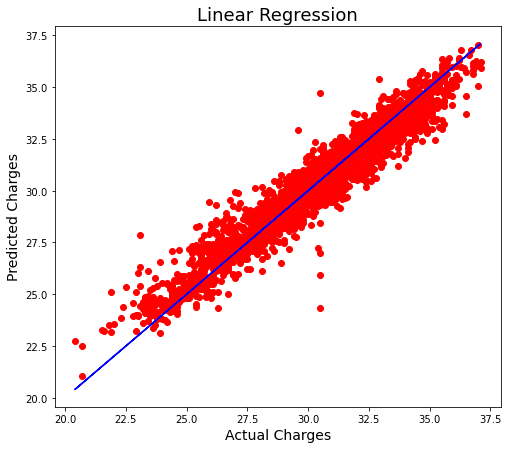

In [724]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [ ]:
####### From above its show the best fit line and best model is Extratreeregressor  with Score 92%

In [ ]:
##### lets perform with second one

In [701]:
df_2 = pd.concat([df_2,cat_col,y2],axis=1)

In [702]:
df_2

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,day,month,year,Next_Tmin
0,-1.664315,-0.379026,-0.839828,0.102515,0.353976,-0.601234,-0.339113,0.010250,0.272985,-0.514175,...,-0.244014,1.189286,-0.005000,-0.092398,1.632550,1.517935,19,5,0,21.2
1,-1.525622,0.721367,-0.755682,-0.308027,0.275822,0.042310,0.162336,-0.672871,-0.270105,-0.546482,...,-0.244014,1.189286,0.511177,-0.122190,-0.163452,1.229950,19,5,0,22.5
2,-1.386929,0.618205,-0.040442,-0.552814,-0.737091,0.129465,0.421151,-0.402329,-1.242660,-0.608363,...,-0.244014,0.653021,0.838510,-0.480087,-0.840961,1.216534,19,5,0,23.9
3,-1.248236,0.755754,0.001631,0.101426,1.173841,-0.010598,-0.183401,-0.698231,0.157489,-0.581458,...,-0.244014,1.991696,0.385280,-0.092398,1.530255,1.201176,19,5,0,24.3
4,-1.109544,0.549430,-0.629463,-0.040098,0.207146,-0.224569,-0.105212,-0.646737,1.467228,-0.830157,...,-0.244014,0.118743,1.807917,-0.426000,-0.180963,1.207205,19,5,0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,-2.235939,2.736370,-2.056591,-1.516692,-1.225012,-2.402934,-0.395847,0.353807,-1.294796,...,-0.244014,-0.149390,-1.263971,-1.033671,-1.385197,-2.093040,19,7,4,18.1
7748,1.525622,-2.235939,-2.396526,-2.241619,-1.757257,-0.986620,-2.423498,-0.157086,-0.415719,-1.272440,...,-0.244014,-0.417522,-1.037356,-0.980309,-1.023840,-2.104553,19,7,4,18.8
7749,1.664315,-2.270327,-2.522744,-2.317504,-1.765083,-0.649986,-2.526196,0.295366,-1.598728,-1.222369,...,-0.244014,-0.417522,-0.269384,-0.908803,-0.821227,-2.074325,19,7,4,17.4
7750,0.000000,0.033621,2.736370,-2.532517,0.151904,-0.011034,0.028296,-2.375713,-2.302405,-1.409773,...,-0.244014,-1.758184,-2.082302,-1.134195,-1.840471,-2.358212,0,0,0,23.1


In [726]:
#### divide x and y 
x1 = df_2.drop(['Next_Tmin'],axis=1)

y1 = df_2['Next_Tmin']

In [728]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
   # print(f"At Random State {i},the tarining accuracy is :- ",{r2_score(y_train,pred_train)})
   # print(f"At Random State {i},the Test accuracy is :- ",{r2_score(y_test,pred_test)})
    accu = r2_score(y_test,pred_test)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=i
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)

Best accuracy - 0.7539079684785855 Best Random state =  112


In [729]:
print('x_train',x_train.shape)

x_train (5193, 25)


In [730]:
print('x_test',x_test.shape)

x_test (2559, 25)


In [731]:
print('y_train',y_train.shape)

y_train (5193,)


In [732]:
print('y_test',y_test.shape)

y_test (2559,)


In [734]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=112)

In [735]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is : {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    print("Training Score : {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are : {}" ,format(predictions))
    print('\n')
    r2score = r2_score(y_test,predictions)
    print("r2 Score is : {}",format(r2score))
    print('Cross Validation Score: {}'.format(cross_val_score(ml_model,x_train,y_train,cv=5,scoring='r2')))
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    
    sns.distplot(y_test-predictions)

Model is : RandomForestRegressor()
Training Score : 0.9844616488344219
Predictions are : {} [33.023 28.446 32.915 ... 33.574 32.377 32.549]


r2 Score is : {} 0.8868354911578928
Cross Validation Score: [0.87934354 0.8652463  0.88508352 0.88185538 0.87877537]
MAE: 0.7642418913638139
MSE: 1.1263569914028915
RMSE: 1.0612996708766527


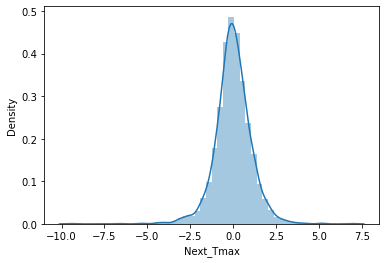

In [736]:
predict(RandomForestRegressor())

Model is : KNeighborsRegressor()
Training Score : 0.9121669643761016
Predictions are : {} [33.32 28.96 32.88 ... 33.96 32.26 32.58]


r2 Score is : {} 0.8698078935266578
Cross Validation Score: [0.85498917 0.84480488 0.84908115 0.85909012 0.85460297]
MAE: 0.8153731926533803
MSE: 1.295837280187573
RMSE: 1.1383484880244594


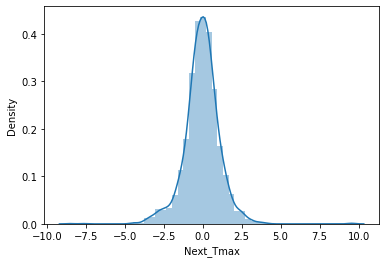

In [737]:
predict(KNeighborsRegressor())

Model is : GradientBoostingRegressor()
Training Score : 0.8615168129189646
Predictions are : {} [33.10228513 27.83532394 32.94279388 ... 33.85029855 32.74649316
 32.16297347]


r2 Score is : {} 0.8319851146915478
Cross Validation Score: [0.82825103 0.80384264 0.84222193 0.81931371 0.8160671 ]
MAE: 0.9750892647478607
MSE: 1.672297636982404
RMSE: 1.2931734752083357


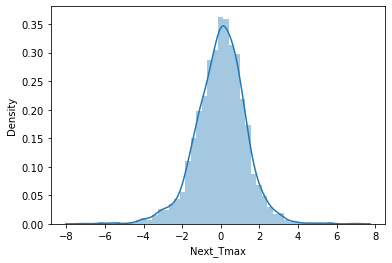

In [738]:
predict(GradientBoostingRegressor())

Model is : LinearRegression()
Training Score : 0.7177986457491492
Predictions are : {} [33.90104906 26.53112857 33.19083877 ... 33.51031521 32.59821356
 31.75745783]


r2 Score is : {} 0.7196708067741091
Cross Validation Score: [0.7110128  0.68182619 0.73523636 0.72293803 0.71648244]
MAE: 1.234269824941556
MSE: 2.7901923484231768
RMSE: 1.6703868858510524


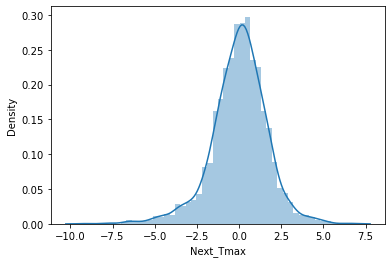

In [739]:
predict(LinearRegression())

Model is : DecisionTreeRegressor()
Training Score : 1.0
Predictions are : {} [34.6 29.3 33.2 ... 35.2 32.7 34.7]


r2 Score is : {} 0.7666893573662918
Cross Validation Score: [0.72391251 0.69695897 0.75836375 0.74382779 0.73444816]
MAE: 1.0514263384134428
MSE: 2.3222039859320045
RMSE: 1.5238779432526754


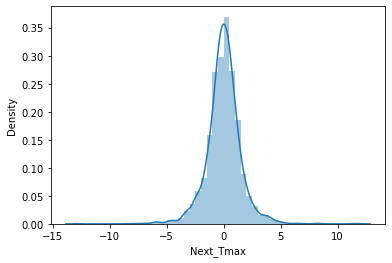

In [740]:
predict(DecisionTreeRegressor())

Model is : SVR()
Training Score : 0.7747579368469593
Predictions are : {} [33.28645237 27.51987865 33.05575973 ... 34.03516549 32.80978461
 32.33504003]


r2 Score is : {} 0.7642586536493601
Cross Validation Score: [0.7557758  0.72015288 0.77164444 0.76198403 0.76468677]
MAE: 1.0979311684486937
MSE: 2.3463974380452908
RMSE: 1.5317954948508272


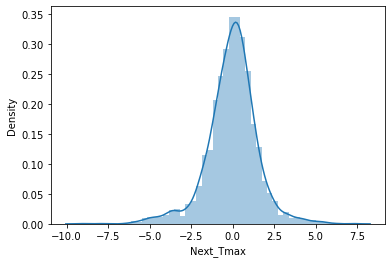

In [741]:
from sklearn.svm import SVR
predict(SVR())

Model is : ExtraTreesRegressor()
Training Score : 1.0
Predictions are : {} [32.991 29.052 33.028 ... 33.412 32.419 32.071]


r2 Score is : {} 0.9129720233994769
Cross Validation Score: [0.90814844 0.89476498 0.91509877 0.91104536 0.90889211]
MAE: 0.6690605705353653
MSE: 0.8662130105509962
RMSE: 0.930705651938891


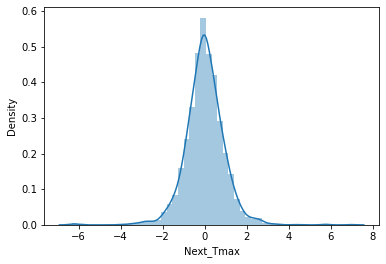

In [742]:
predict(ExtraTreesRegressor())

In [743]:
GD = GradientBoostingRegressor()
GD.fit(x_train,y_train)
pred_test=GD.predict(x_test)
pred_train=GD.predict(x_train)

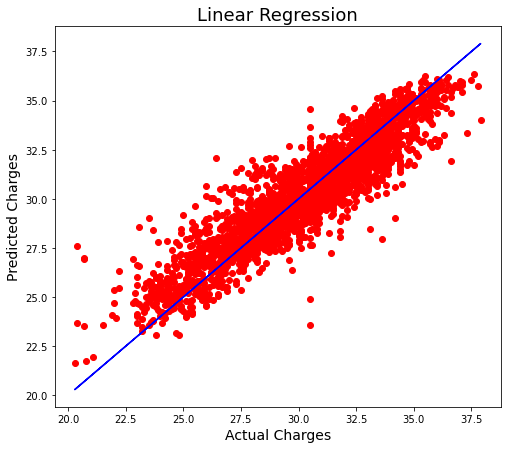

In [744]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [ ]:
##### GredientBoost Regressor is the best model and its showing in best fit all data are spareading on line 